## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  99.242995   933.680628  0.760340   2.251865  1.537031
1  33.754080  1464.281636  0.583737   2.043490  1.467868
2  15.050112   315.617007  0.547323   3.491694  1.344381
3  71.269988  1725.190796  0.371434  10.133305  1.554552
4  59.973815   518.308111  0.287302   8.440284  1.347514


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.84641 | train_mse: 10.24654| train_mae: 2.33781 |  0:00:00s
epoch 1  | loss: 0.58817 | train_mse: 6.23679 | train_mae: 1.81247 |  0:00:00s
epoch 2  | loss: 0.47895 | train_mse: 2.94145 | train_mae: 1.3457  |  0:00:00s


epoch 3  | loss: 0.56097 | train_mse: 1.6037  | train_mae: 0.97497 |  0:00:00s
epoch 4  | loss: 0.41582 | train_mse: 1.49355 | train_mae: 0.91892 |  0:00:00s


epoch 5  | loss: 0.41442 | train_mse: 1.13867 | train_mae: 0.83377 |  0:00:00s
epoch 6  | loss: 0.34089 | train_mse: 0.78155 | train_mae: 0.66752 |  0:00:00s
epoch 7  | loss: 0.42476 | train_mse: 0.72929 | train_mae: 0.62862 |  0:00:00s


epoch 8  | loss: 0.34918 | train_mse: 0.72794 | train_mae: 0.62977 |  0:00:00s
epoch 9  | loss: 0.58494 | train_mse: 0.54093 | train_mae: 0.5574  |  0:00:01s
epoch 10 | loss: 0.52308 | train_mse: 0.39228 | train_mae: 0.50736 |  0:00:01s


epoch 11 | loss: 0.4652  | train_mse: 0.31252 | train_mae: 0.46047 |  0:00:01s
epoch 12 | loss: 0.4042  | train_mse: 0.51492 | train_mae: 0.53823 |  0:00:01s
epoch 13 | loss: 0.30991 | train_mse: 0.82197 | train_mae: 0.68111 |  0:00:01s


epoch 14 | loss: 0.57541 | train_mse: 1.01542 | train_mae: 0.78499 |  0:00:01s
epoch 15 | loss: 0.27619 | train_mse: 0.5618  | train_mae: 0.60585 |  0:00:01s
epoch 16 | loss: 0.28024 | train_mse: 0.33277 | train_mae: 0.46158 |  0:00:01s


epoch 17 | loss: 0.40907 | train_mse: 0.29585 | train_mae: 0.41073 |  0:00:01s
epoch 18 | loss: 0.34277 | train_mse: 0.25994 | train_mae: 0.38346 |  0:00:01s
epoch 19 | loss: 0.27796 | train_mse: 0.26693 | train_mae: 0.37882 |  0:00:01s


epoch 20 | loss: 0.22371 | train_mse: 0.28195 | train_mae: 0.39644 |  0:00:01s
epoch 21 | loss: 0.19335 | train_mse: 0.24979 | train_mae: 0.36807 |  0:00:02s
epoch 22 | loss: 0.39124 | train_mse: 0.23764 | train_mae: 0.36379 |  0:00:02s


epoch 23 | loss: 0.19494 | train_mse: 0.26265 | train_mae: 0.37689 |  0:00:02s
epoch 24 | loss: 0.19411 | train_mse: 0.41032 | train_mae: 0.47449 |  0:00:02s
epoch 25 | loss: 0.40989 | train_mse: 0.48795 | train_mae: 0.51302 |  0:00:02s


epoch 26 | loss: 0.26325 | train_mse: 0.30519 | train_mae: 0.41347 |  0:00:02s
epoch 27 | loss: 0.22326 | train_mse: 0.24406 | train_mae: 0.36614 |  0:00:02s


epoch 28 | loss: 0.25555 | train_mse: 0.20368 | train_mae: 0.34671 |  0:00:02s
epoch 29 | loss: 0.2639  | train_mse: 0.19317 | train_mae: 0.35179 |  0:00:02s


epoch 30 | loss: 0.27021 | train_mse: 0.19217 | train_mae: 0.35063 |  0:00:02s
epoch 31 | loss: 0.21581 | train_mse: 0.17015 | train_mae: 0.32634 |  0:00:02s
epoch 32 | loss: 0.25709 | train_mse: 0.17402 | train_mae: 0.32537 |  0:00:03s


epoch 33 | loss: 0.35616 | train_mse: 0.17783 | train_mae: 0.32977 |  0:00:03s
epoch 34 | loss: 0.26263 | train_mse: 0.17112 | train_mae: 0.32436 |  0:00:03s
epoch 35 | loss: 0.15922 | train_mse: 0.12721 | train_mae: 0.28348 |  0:00:03s


epoch 36 | loss: 0.16578 | train_mse: 0.12487 | train_mae: 0.27378 |  0:00:03s
epoch 37 | loss: 0.22842 | train_mse: 0.16573 | train_mae: 0.29183 |  0:00:03s
epoch 38 | loss: 0.20338 | train_mse: 0.20533 | train_mae: 0.31727 |  0:00:03s


epoch 39 | loss: 0.16562 | train_mse: 0.20235 | train_mae: 0.32172 |  0:00:03s
epoch 40 | loss: 0.25857 | train_mse: 0.2158  | train_mae: 0.32536 |  0:00:03s
epoch 41 | loss: 0.29088 | train_mse: 0.19922 | train_mae: 0.3181  |  0:00:03s


epoch 42 | loss: 0.24378 | train_mse: 0.17795 | train_mae: 0.31875 |  0:00:03s
epoch 43 | loss: 0.27201 | train_mse: 0.14093 | train_mae: 0.30069 |  0:00:03s
epoch 44 | loss: 0.25616 | train_mse: 0.14688 | train_mae: 0.30818 |  0:00:03s


epoch 45 | loss: 0.25788 | train_mse: 0.1662  | train_mae: 0.32677 |  0:00:04s
epoch 46 | loss: 0.45422 | train_mse: 0.18241 | train_mae: 0.33334 |  0:00:04s
epoch 47 | loss: 0.14652 | train_mse: 0.19581 | train_mae: 0.33994 |  0:00:04s


epoch 48 | loss: 0.27488 | train_mse: 0.18056 | train_mae: 0.33153 |  0:00:04s
epoch 49 | loss: 0.28043 | train_mse: 0.17298 | train_mae: 0.33608 |  0:00:04s
epoch 50 | loss: 0.29424 | train_mse: 0.17973 | train_mae: 0.34653 |  0:00:04s


epoch 51 | loss: 0.30548 | train_mse: 0.14246 | train_mae: 0.30302 |  0:00:04s
epoch 52 | loss: 0.22866 | train_mse: 0.15804 | train_mae: 0.29478 |  0:00:04s
epoch 53 | loss: 0.21087 | train_mse: 0.16439 | train_mae: 0.29395 |  0:00:04s


epoch 54 | loss: 0.30705 | train_mse: 0.17601 | train_mae: 0.29529 |  0:00:04s
epoch 55 | loss: 0.30291 | train_mse: 0.19806 | train_mae: 0.31496 |  0:00:04s
epoch 56 | loss: 0.28075 | train_mse: 0.18789 | train_mae: 0.31929 |  0:00:04s


epoch 57 | loss: 0.21368 | train_mse: 0.16542 | train_mae: 0.30565 |  0:00:05s
epoch 58 | loss: 0.21391 | train_mse: 0.17139 | train_mae: 0.31471 |  0:00:05s
epoch 59 | loss: 0.19963 | train_mse: 0.14974 | train_mae: 0.28833 |  0:00:05s


epoch 60 | loss: 0.16569 | train_mse: 0.15584 | train_mae: 0.28962 |  0:00:05s
epoch 61 | loss: 0.17018 | train_mse: 0.1604  | train_mae: 0.292   |  0:00:05s
epoch 62 | loss: 0.16165 | train_mse: 0.17045 | train_mae: 0.29963 |  0:00:05s


epoch 63 | loss: 0.18711 | train_mse: 0.18542 | train_mae: 0.31154 |  0:00:05s
epoch 64 | loss: 0.18784 | train_mse: 0.14808 | train_mae: 0.29129 |  0:00:05s
epoch 65 | loss: 0.20339 | train_mse: 0.13502 | train_mae: 0.28164 |  0:00:05s


epoch 66 | loss: 0.28386 | train_mse: 0.12735 | train_mae: 0.26786 |  0:00:05s
epoch 67 | loss: 0.19029 | train_mse: 0.14132 | train_mae: 0.2932  |  0:00:06s
epoch 68 | loss: 0.22555 | train_mse: 0.13085 | train_mae: 0.27999 |  0:00:06s


epoch 69 | loss: 0.23793 | train_mse: 0.17043 | train_mae: 0.31132 |  0:00:06s
epoch 70 | loss: 0.33899 | train_mse: 0.20953 | train_mae: 0.32547 |  0:00:06s
epoch 71 | loss: 0.20235 | train_mse: 0.19417 | train_mae: 0.31191 |  0:00:06s


epoch 72 | loss: 0.24144 | train_mse: 0.1494  | train_mae: 0.29226 |  0:00:06s
epoch 73 | loss: 0.1557  | train_mse: 0.13894 | train_mae: 0.28339 |  0:00:06s
epoch 74 | loss: 0.25073 | train_mse: 0.20912 | train_mae: 0.31645 |  0:00:06s


epoch 75 | loss: 0.17574 | train_mse: 0.22062 | train_mae: 0.32703 |  0:00:06s
epoch 76 | loss: 0.17855 | train_mse: 0.1728  | train_mae: 0.3072  |  0:00:06s
epoch 77 | loss: 0.28714 | train_mse: 0.15153 | train_mae: 0.29599 |  0:00:06s


epoch 78 | loss: 0.19287 | train_mse: 0.11856 | train_mae: 0.25667 |  0:00:06s
epoch 79 | loss: 0.27857 | train_mse: 0.12934 | train_mae: 0.2641  |  0:00:07s
epoch 80 | loss: 0.19155 | train_mse: 0.12056 | train_mae: 0.25774 |  0:00:07s


epoch 81 | loss: 0.27815 | train_mse: 0.11483 | train_mae: 0.26096 |  0:00:07s
epoch 82 | loss: 0.31669 | train_mse: 0.12251 | train_mae: 0.26335 |  0:00:07s
epoch 83 | loss: 0.17825 | train_mse: 0.16323 | train_mae: 0.29631 |  0:00:07s


epoch 84 | loss: 0.26586 | train_mse: 0.18394 | train_mae: 0.31207 |  0:00:07s
epoch 85 | loss: 0.20815 | train_mse: 0.20648 | train_mae: 0.32728 |  0:00:07s
epoch 86 | loss: 0.32335 | train_mse: 0.24195 | train_mae: 0.35447 |  0:00:07s


epoch 87 | loss: 0.20566 | train_mse: 0.23158 | train_mae: 0.35045 |  0:00:07s
epoch 88 | loss: 0.1717  | train_mse: 0.15547 | train_mae: 0.28608 |  0:00:07s
epoch 89 | loss: 0.16595 | train_mse: 0.1214  | train_mae: 0.261   |  0:00:07s


epoch 90 | loss: 0.26569 | train_mse: 0.10185 | train_mae: 0.24291 |  0:00:07s
epoch 91 | loss: 0.21926 | train_mse: 0.09692 | train_mae: 0.23938 |  0:00:08s
epoch 92 | loss: 0.12431 | train_mse: 0.09247 | train_mae: 0.23557 |  0:00:08s


epoch 93 | loss: 0.17583 | train_mse: 0.08721 | train_mae: 0.22218 |  0:00:08s
epoch 94 | loss: 0.1449  | train_mse: 0.10081 | train_mae: 0.25513 |  0:00:08s
epoch 95 | loss: 0.16035 | train_mse: 0.09692 | train_mae: 0.24783 |  0:00:08s


epoch 96 | loss: 0.14613 | train_mse: 0.09478 | train_mae: 0.23652 |  0:00:08s
epoch 97 | loss: 0.15713 | train_mse: 0.10354 | train_mae: 0.23671 |  0:00:08s
epoch 98 | loss: 0.12142 | train_mse: 0.10689 | train_mae: 0.23912 |  0:00:08s


epoch 99 | loss: 0.30163 | train_mse: 0.11699 | train_mae: 0.2523  |  0:00:08s
epoch 100| loss: 0.15494 | train_mse: 0.10895 | train_mae: 0.24567 |  0:00:08s
epoch 101| loss: 0.28977 | train_mse: 0.11686 | train_mae: 0.25535 |  0:00:08s


epoch 102| loss: 0.20107 | train_mse: 0.21048 | train_mae: 0.31589 |  0:00:08s
epoch 103| loss: 0.16703 | train_mse: 0.20209 | train_mae: 0.2983  |  0:00:09s
epoch 104| loss: 0.12134 | train_mse: 0.16413 | train_mae: 0.27322 |  0:00:09s


epoch 105| loss: 0.24713 | train_mse: 0.18892 | train_mae: 0.287   |  0:00:09s
epoch 106| loss: 0.15602 | train_mse: 0.16201 | train_mae: 0.27651 |  0:00:09s
epoch 107| loss: 0.21299 | train_mse: 0.17927 | train_mae: 0.27251 |  0:00:09s


epoch 108| loss: 0.25981 | train_mse: 0.2373  | train_mae: 0.31026 |  0:00:09s
epoch 109| loss: 0.20786 | train_mse: 0.22889 | train_mae: 0.32183 |  0:00:09s
epoch 110| loss: 0.1354  | train_mse: 0.19369 | train_mae: 0.31118 |  0:00:09s


epoch 111| loss: 0.16512 | train_mse: 0.1192  | train_mae: 0.26291 |  0:00:09s
epoch 112| loss: 0.18233 | train_mse: 0.08655 | train_mae: 0.23445 |  0:00:09s
epoch 113| loss: 0.15254 | train_mse: 0.09462 | train_mae: 0.24831 |  0:00:09s


epoch 114| loss: 0.14741 | train_mse: 0.09345 | train_mae: 0.2468  |  0:00:09s
epoch 115| loss: 0.11355 | train_mse: 0.11347 | train_mae: 0.26152 |  0:00:10s
epoch 116| loss: 0.25185 | train_mse: 0.09086 | train_mae: 0.23654 |  0:00:10s


epoch 117| loss: 0.12738 | train_mse: 0.08497 | train_mae: 0.22712 |  0:00:10s
epoch 118| loss: 0.16086 | train_mse: 0.08387 | train_mae: 0.22329 |  0:00:10s
epoch 119| loss: 0.18261 | train_mse: 0.10196 | train_mae: 0.23988 |  0:00:10s


epoch 120| loss: 0.16775 | train_mse: 0.09719 | train_mae: 0.23792 |  0:00:10s
epoch 121| loss: 0.15609 | train_mse: 0.10766 | train_mae: 0.25012 |  0:00:10s
epoch 122| loss: 0.12175 | train_mse: 0.12144 | train_mae: 0.26227 |  0:00:10s


epoch 123| loss: 0.2694  | train_mse: 0.15377 | train_mae: 0.28349 |  0:00:10s
epoch 124| loss: 0.15646 | train_mse: 0.10482 | train_mae: 0.23646 |  0:00:10s
epoch 125| loss: 0.28628 | train_mse: 0.08545 | train_mae: 0.22172 |  0:00:10s


epoch 126| loss: 0.21333 | train_mse: 0.09109 | train_mae: 0.23116 |  0:00:10s
epoch 127| loss: 0.08763 | train_mse: 0.10168 | train_mae: 0.24558 |  0:00:11s
epoch 128| loss: 0.20677 | train_mse: 0.10055 | train_mae: 0.24363 |  0:00:11s


epoch 129| loss: 0.23738 | train_mse: 0.10156 | train_mae: 0.24495 |  0:00:11s
epoch 130| loss: 0.13025 | train_mse: 0.09864 | train_mae: 0.23768 |  0:00:11s
epoch 131| loss: 0.17641 | train_mse: 0.09386 | train_mae: 0.23806 |  0:00:11s


epoch 132| loss: 0.13661 | train_mse: 0.09263 | train_mae: 0.23481 |  0:00:11s
epoch 133| loss: 0.26476 | train_mse: 0.12389 | train_mae: 0.28265 |  0:00:11s
epoch 134| loss: 0.13883 | train_mse: 0.1045  | train_mae: 0.26804 |  0:00:11s


epoch 135| loss: 0.22158 | train_mse: 0.11977 | train_mae: 0.26526 |  0:00:11s
epoch 136| loss: 0.11591 | train_mse: 0.14768 | train_mae: 0.27376 |  0:00:11s
epoch 137| loss: 0.17241 | train_mse: 0.13242 | train_mae: 0.26125 |  0:00:11s


epoch 138| loss: 0.17136 | train_mse: 0.11911 | train_mae: 0.25447 |  0:00:11s
epoch 139| loss: 0.12124 | train_mse: 0.133   | train_mae: 0.26181 |  0:00:11s
epoch 140| loss: 0.22033 | train_mse: 0.18904 | train_mae: 0.29091 |  0:00:12s


epoch 141| loss: 0.22291 | train_mse: 0.2165  | train_mae: 0.30437 |  0:00:12s
epoch 142| loss: 0.14537 | train_mse: 0.13387 | train_mae: 0.26322 |  0:00:12s
epoch 143| loss: 0.48459 | train_mse: 0.09674 | train_mae: 0.24007 |  0:00:12s


epoch 144| loss: 0.13284 | train_mse: 0.08522 | train_mae: 0.23175 |  0:00:12s
epoch 145| loss: 0.19658 | train_mse: 0.09579 | train_mae: 0.25143 |  0:00:12s


epoch 146| loss: 0.16425 | train_mse: 0.11959 | train_mae: 0.27193 |  0:00:12s
epoch 147| loss: 0.27105 | train_mse: 0.13078 | train_mae: 0.27468 |  0:00:12s
epoch 148| loss: 0.16801 | train_mse: 0.10984 | train_mae: 0.25981 |  0:00:12s


epoch 149| loss: 0.10127 | train_mse: 0.08834 | train_mae: 0.23809 |  0:00:12s
epoch 150| loss: 0.22656 | train_mse: 0.09399 | train_mae: 0.23773 |  0:00:13s
epoch 151| loss: 0.1397  | train_mse: 0.08726 | train_mae: 0.23325 |  0:00:13s


epoch 152| loss: 0.16163 | train_mse: 0.15291 | train_mae: 0.28492 |  0:00:13s
epoch 153| loss: 0.16593 | train_mse: 0.14384 | train_mae: 0.28913 |  0:00:13s
epoch 154| loss: 0.15448 | train_mse: 0.10931 | train_mae: 0.24609 |  0:00:13s


epoch 155| loss: 0.18278 | train_mse: 0.10394 | train_mae: 0.24195 |  0:00:13s
epoch 156| loss: 0.23354 | train_mse: 0.17926 | train_mae: 0.28121 |  0:00:13s
epoch 157| loss: 0.13911 | train_mse: 0.16794 | train_mae: 0.28606 |  0:00:13s


epoch 158| loss: 0.10368 | train_mse: 0.18297 | train_mae: 0.29337 |  0:00:13s
epoch 159| loss: 0.1185  | train_mse: 0.16044 | train_mae: 0.29436 |  0:00:13s
epoch 160| loss: 0.22892 | train_mse: 0.09694 | train_mae: 0.24907 |  0:00:13s


epoch 161| loss: 0.15857 | train_mse: 0.08629 | train_mae: 0.22646 |  0:00:13s
epoch 162| loss: 0.22311 | train_mse: 0.1143  | train_mae: 0.2613  |  0:00:14s


epoch 163| loss: 0.1645  | train_mse: 0.10868 | train_mae: 0.24991 |  0:00:14s
epoch 164| loss: 0.13703 | train_mse: 0.08921 | train_mae: 0.22621 |  0:00:14s
epoch 165| loss: 0.1217  | train_mse: 0.09151 | train_mae: 0.22517 |  0:00:14s


epoch 166| loss: 0.18557 | train_mse: 0.08475 | train_mae: 0.22384 |  0:00:14s
epoch 167| loss: 0.20434 | train_mse: 0.09141 | train_mae: 0.23767 |  0:00:14s
epoch 168| loss: 0.14393 | train_mse: 0.10267 | train_mae: 0.25312 |  0:00:14s


epoch 169| loss: 0.21231 | train_mse: 0.10428 | train_mae: 0.25684 |  0:00:14s
epoch 170| loss: 0.34576 | train_mse: 0.09757 | train_mae: 0.24937 |  0:00:14s
epoch 171| loss: 0.14506 | train_mse: 0.08857 | train_mae: 0.23543 |  0:00:14s


epoch 172| loss: 0.36011 | train_mse: 0.07531 | train_mae: 0.21197 |  0:00:14s
epoch 173| loss: 0.1566  | train_mse: 0.07173 | train_mae: 0.22361 |  0:00:15s
epoch 174| loss: 0.09268 | train_mse: 0.06588 | train_mae: 0.20794 |  0:00:15s


epoch 175| loss: 0.18457 | train_mse: 0.06534 | train_mae: 0.19889 |  0:00:15s
epoch 176| loss: 0.16236 | train_mse: 0.06858 | train_mae: 0.20509 |  0:00:15s
epoch 177| loss: 0.13309 | train_mse: 0.07554 | train_mae: 0.21419 |  0:00:15s


epoch 178| loss: 0.16627 | train_mse: 0.08274 | train_mae: 0.2142  |  0:00:15s
epoch 179| loss: 0.29943 | train_mse: 0.10279 | train_mae: 0.23463 |  0:00:15s
epoch 180| loss: 0.1831  | train_mse: 0.1276  | train_mae: 0.257   |  0:00:15s


epoch 181| loss: 0.19907 | train_mse: 0.08047 | train_mae: 0.22014 |  0:00:15s
epoch 182| loss: 0.12431 | train_mse: 0.06487 | train_mae: 0.20183 |  0:00:15s
epoch 183| loss: 0.12763 | train_mse: 0.07674 | train_mae: 0.22405 |  0:00:15s


epoch 184| loss: 0.12717 | train_mse: 0.11026 | train_mae: 0.25834 |  0:00:15s
epoch 185| loss: 0.18828 | train_mse: 0.09044 | train_mae: 0.23105 |  0:00:15s
epoch 186| loss: 0.15504 | train_mse: 0.09228 | train_mae: 0.21705 |  0:00:16s


epoch 187| loss: 0.11336 | train_mse: 0.09962 | train_mae: 0.23418 |  0:00:16s
epoch 188| loss: 0.14529 | train_mse: 0.10854 | train_mae: 0.26239 |  0:00:16s
epoch 189| loss: 0.1288  | train_mse: 0.10652 | train_mae: 0.26661 |  0:00:16s


epoch 190| loss: 0.15032 | train_mse: 0.10431 | train_mae: 0.23628 |  0:00:16s
epoch 191| loss: 0.10301 | train_mse: 0.11574 | train_mae: 0.23456 |  0:00:16s
epoch 192| loss: 0.12091 | train_mse: 0.12123 | train_mae: 0.23075 |  0:00:16s


epoch 193| loss: 0.29563 | train_mse: 0.09821 | train_mae: 0.22631 |  0:00:16s
epoch 194| loss: 0.16461 | train_mse: 0.08237 | train_mae: 0.22655 |  0:00:16s
epoch 195| loss: 0.14441 | train_mse: 0.08194 | train_mae: 0.2244  |  0:00:16s


epoch 196| loss: 0.08823 | train_mse: 0.08861 | train_mae: 0.22704 |  0:00:16s
epoch 197| loss: 0.17875 | train_mse: 0.08343 | train_mae: 0.22327 |  0:00:16s
epoch 198| loss: 0.25748 | train_mse: 0.09961 | train_mae: 0.22943 |  0:00:17s


epoch 199| loss: 0.08462 | train_mse: 0.1123  | train_mae: 0.23308 |  0:00:17s
epoch 200| loss: 0.15283 | train_mse: 0.10888 | train_mae: 0.22585 |  0:00:17s
epoch 201| loss: 0.1614  | train_mse: 0.0821  | train_mae: 0.21325 |  0:00:17s


epoch 202| loss: 0.17632 | train_mse: 0.06914 | train_mae: 0.20098 |  0:00:17s
epoch 203| loss: 0.17973 | train_mse: 0.10127 | train_mae: 0.22188 |  0:00:17s
epoch 204| loss: 0.31499 | train_mse: 0.17095 | train_mae: 0.26224 |  0:00:17s


epoch 205| loss: 0.16202 | train_mse: 0.2476  | train_mae: 0.29073 |  0:00:17s
epoch 206| loss: 0.23402 | train_mse: 0.19422 | train_mae: 0.28156 |  0:00:17s
epoch 207| loss: 0.14023 | train_mse: 0.14055 | train_mae: 0.28174 |  0:00:17s


epoch 208| loss: 0.21968 | train_mse: 0.11096 | train_mae: 0.25713 |  0:00:17s
epoch 209| loss: 0.16575 | train_mse: 0.08012 | train_mae: 0.22052 |  0:00:17s
epoch 210| loss: 0.25724 | train_mse: 0.10098 | train_mae: 0.25395 |  0:00:18s


epoch 211| loss: 0.30484 | train_mse: 0.1367  | train_mae: 0.27154 |  0:00:18s
epoch 212| loss: 0.17341 | train_mse: 0.11067 | train_mae: 0.24441 |  0:00:18s
epoch 213| loss: 0.3016  | train_mse: 0.10409 | train_mae: 0.24307 |  0:00:18s


epoch 214| loss: 0.27445 | train_mse: 0.09059 | train_mae: 0.22545 |  0:00:18s
epoch 215| loss: 0.08263 | train_mse: 0.09028 | train_mae: 0.23952 |  0:00:18s
epoch 216| loss: 0.14281 | train_mse: 0.0888  | train_mae: 0.24201 |  0:00:18s


epoch 217| loss: 0.18018 | train_mse: 0.08174 | train_mae: 0.22507 |  0:00:18s
epoch 218| loss: 0.15185 | train_mse: 0.07079 | train_mae: 0.2048  |  0:00:18s


epoch 219| loss: 0.15816 | train_mse: 0.07415 | train_mae: 0.22113 |  0:00:18s
epoch 220| loss: 0.119   | train_mse: 0.08458 | train_mae: 0.2323  |  0:00:19s
epoch 221| loss: 0.09766 | train_mse: 0.09299 | train_mae: 0.23763 |  0:00:19s


epoch 222| loss: 0.16909 | train_mse: 0.14894 | train_mae: 0.2604  |  0:00:19s
epoch 223| loss: 0.10944 | train_mse: 0.15489 | train_mae: 0.26921 |  0:00:19s
epoch 224| loss: 0.2186  | train_mse: 0.09814 | train_mae: 0.24121 |  0:00:19s


epoch 225| loss: 0.16157 | train_mse: 0.08353 | train_mae: 0.23515 |  0:00:19s

Early stopping occurred at epoch 225 with best_epoch = 175 and best_train_mae = 0.19889
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

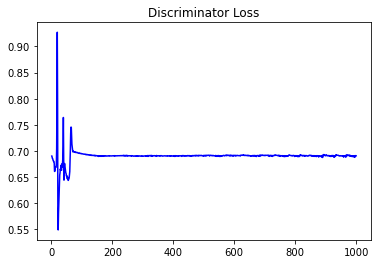

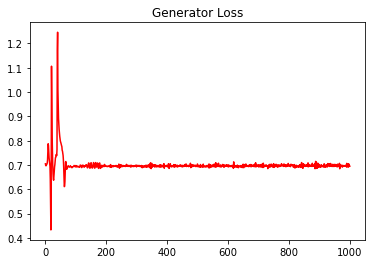

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29612523959313447


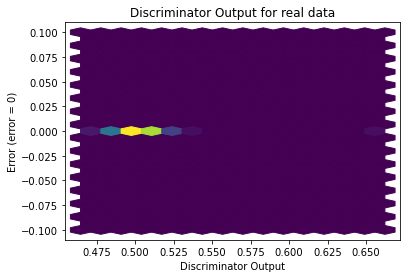

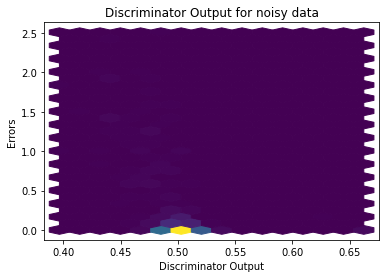

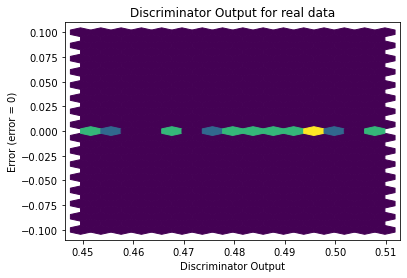

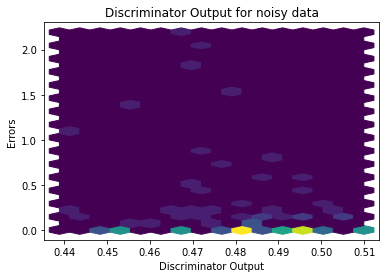

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


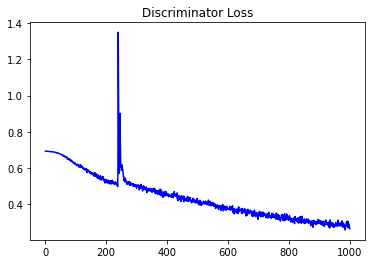

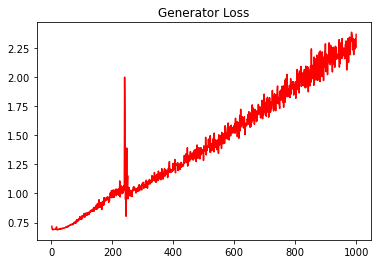

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1378856468248263


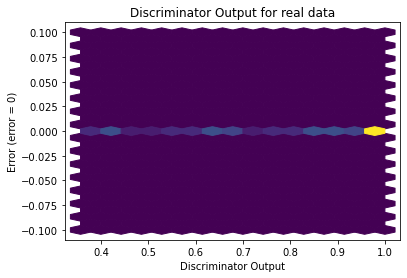

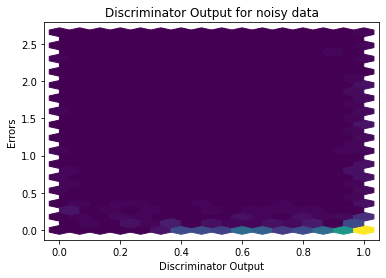

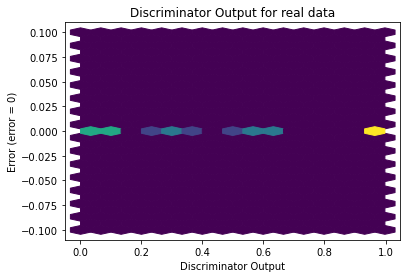

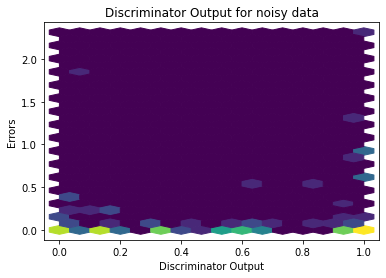

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
